In [14]:
import torch
from src.utils.simulator import ProportionTrafficGenerator
from src.inference.bayesian import BayesianBinaryTester

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)

Setting parameters for generating traffic. The traffic is collected every 30 minutes, over a period of 2 weeks. For the small sample, there are 100 visitors every interval, while the larger sample has 1000 visitors. We only direct 10% of the traffic to the variant.

In [ ]:
SAMPLING_INTERVAL = torch.tensor(24 * 2) # every half an hour
TEST_DURATION = torch.tensor(14)
TRUE_PROP = torch.tensor([0.1, 0.101])
TRAFFIC_SIZE = torch.tensor(100)
TRAFFIC_SIZE_LARGE = torch.tensor(1000)
TREATMENT_PROPORTION = torch.tensor(0.1)

# Small Sample (N=100 per 30 minute)

In [2]:
traffic_generator = ProportionTrafficGenerator(
    N=SAMPLING_INTERVAL * TEST_DURATION,
    p=TRUE_PROP,
    traffic_size=TRAFFIC_SIZE,
    treatment_proportion=TREATMENT_PROPORTION
)
sample = traffic_generator.generate_traffic()

In [15]:
sample

tensor([[ 4.,  0.],
        [ 7.,  2.],
        [10.,  0.],
        ...,
        [ 8.,  1.],
        [ 6.,  1.],
        [ 8.,  0.]])

Here is a snippet of the sample traffic. on the left is the number of clicks of the control variant while the right represent the treatment traffic.

In [3]:
binary_test = BayesianBinaryTester(traffic_size=traffic_generator.split_traffic_size, outcome=sample)
binary_test.run()

Sample: 100%|██████████| 1100/1100 [00:08, 134.88it/s, step size=1.01e+00, acc. prob=0.861]


In [4]:
binary_test.summary()

Potential cost of not switching: 0.07%
Cost of wrong switch: 0.27%
Probability of Treatment is better: 31.17%


The test shows that the probability of the treatment being better is only 32% and the cost of switch is higher than the cost of no switch. Setting a minimal level of accepted risk at 0.1%, we would conclude that we should not switch.

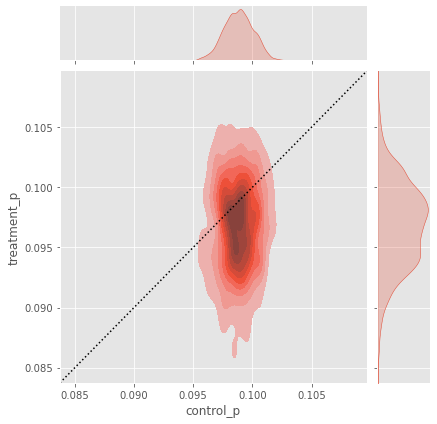

In [5]:
binary_test.plot_joint_posterior()

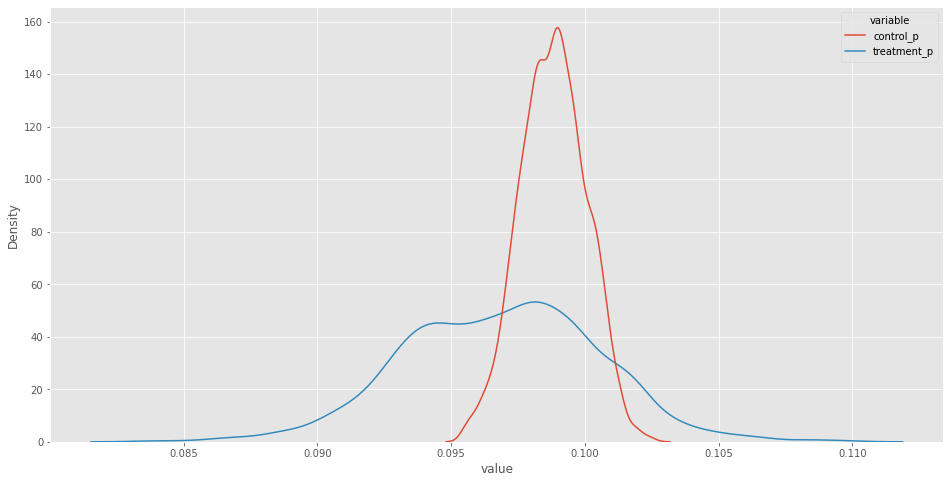

In [6]:
binary_test.plot_posterior()

The joint density and the marginal density both shows that the gain does not out weigh the risk of switch.

# Small Sample (N=1000 per 30 minute)

In [7]:
traffic_generator_large = ProportionTrafficGenerator(
    N=SAMPLING_INTERVAL * TEST_DURATION,
    p=TRUE_PROP,
    traffic_size=TRAFFIC_SIZE_LARGE,
    treatment_proportion=TREATMENT_PROPORTION
)
sample_large = traffic_generator_large.generate_traffic()

In [16]:
sample_large

tensor([[ 88.,  11.],
        [102.,  12.],
        [ 91.,   9.],
        ...,
        [ 98.,  10.],
        [ 82.,   5.],
        [ 91.,  16.]])

We now have a larger sample size, but the parameters are all the same.

In [8]:
binary_test_large_sample = BayesianBinaryTester(traffic_size=traffic_generator_large.split_traffic_size, outcome=sample_large)
binary_test_large_sample.run()

Sample: 100%|██████████| 1100/1100 [00:09, 119.41it/s, step size=5.76e-01, acc. prob=0.875]


In [9]:
binary_test_large_sample.summary()

Potential cost of not switching: 0.34%
Cost of wrong switch: 0.00%
Probability of Treatment is better: 99.80%


We now have very strong evidence that we should switch, with the probability of the treatment better than the control at 99.8% and the cost of switching is alsmot 0.

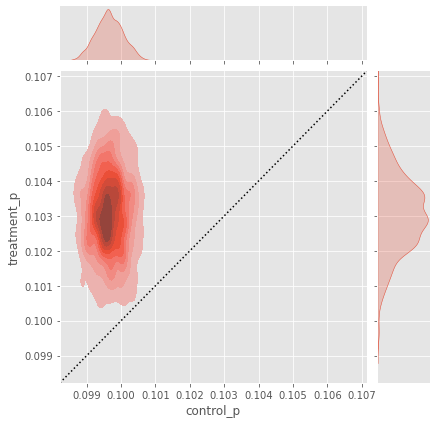

In [10]:
binary_test_large_sample.plot_joint_posterior()

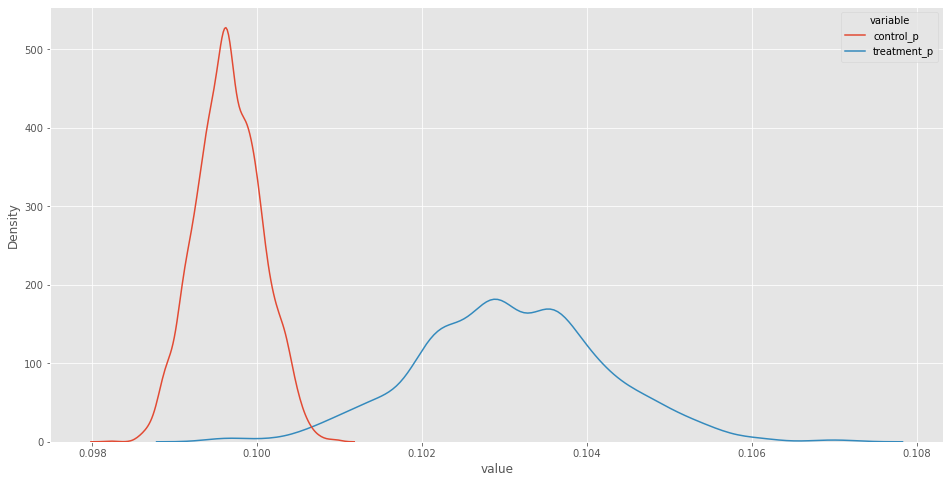

In [11]:
binary_test_large_sample.plot_posterior()

The treatment is clearly better, the primary difference is that we have larger sample to detect the changes now.